## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.nunique()[0]

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
n_nonmatch = df.shape[0]- \
df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')].shape[0] - \
df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')].shape[0]
n_nonmatch

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [79]:
condition1 = (df['group'] == 'treatment') & (df['landing_page'] == 'new_page')
condition2 = (df['group'] == 'control') & (df['landing_page'] == 'old_page')
df2 = df[(condition1) | (condition2)].reset_index(drop=True)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2['user_id'].iloc[df2['user_id'].duplicated(keep=False).index[df2['user_id'].duplicated(keep=False) == True].tolist()]

1876    773192
2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
ind_rep = df2['user_id'].duplicated(keep=False).index[df2['user_id'].duplicated(keep=False) == True]
df2.iloc[ind_rep]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates('user_id', inplace=True)
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
probability_conv = df.converted.mean()
probability_conv

0.11965919355605512

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

d. What is the probability that an individual received the new page?

In [17]:
(df2.landing_page == 'new_page').mean()

0.5000619442226688

In [18]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**For the two groups the probabilities of converting are pretty close to each other, that should not lead to a conclusion that the new treatment page leads to more conversions. We ought to test its practical and statistical significance. And we should also take into consideration other factors such as time, group's country origin and so forth.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$**: **$p_{new}$** - **$p_{old}$**  <= 0 <p>
**$H_{1}$**: **$p_{new}$** - **$p_{old}$**  > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [25]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [27]:
n_new = df2.groupby('group').count()['converted'][1]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [28]:
n_old = df2.groupby('group').count()['converted'][0]
n_old

145274

In [31]:
p_new - p_old

0.0

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
new_page_converted = []
for n in range(10000):
    bootstrap_new = df2.sample(df2.shape[0], replace=True)
    new_page_converted.append(bootstrap_new[bootstrap_new.group == 'treatment'].converted.mean())

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [34]:
old_page_converted = []
for n in range(10000):
    bootstrap_old = df2.sample(df2.shape[0], replace=True)
    old_page_converted.append(bootstrap_old[bootstrap_old.group == 'control'].converted.mean())

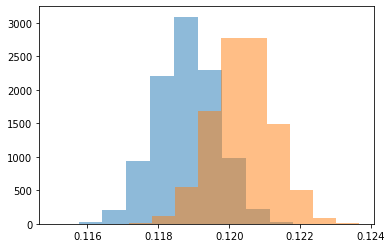

In [35]:
new_page_converted = np.array(new_page_converted)
old_page_converted = np.array(old_page_converted)
plt.hist(new_page_converted, alpha = 0.5);
plt.hist(old_page_converted, alpha = 0.5); 

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [36]:
new_page_converted - old_page_converted

array([-5.62811515e-04, -1.40446197e-03, -2.19403648e-03, ...,
       -9.44747565e-06, -2.17236623e-03, -2.26534775e-03])

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [37]:
p_diffs = []
for _ in range(10000):
    diff_bootstrap = df2.sample(df2.shape[0], replace=True)
    new_cr = diff_bootstrap[diff_bootstrap.group == 'treatment'].converted.mean()
    old_cr = diff_bootstrap[diff_bootstrap.group == 'control'].converted.mean()
    obs_diff = new_cr - old_cr
    p_diffs.append(obs_diff)

In [38]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   6.,   55.,  355., 1299., 2506., 2908., 1976.,  710.,  163.,
          22.]),
 array([-6.41428713e-03, -5.49336168e-03, -4.57243623e-03, -3.65151078e-03,
        -2.73058533e-03, -1.80965988e-03, -8.88734430e-04,  3.21910192e-05,
         9.53116469e-04,  1.87404192e-03,  2.79496737e-03]),
 <a list of 10 Patch objects>)

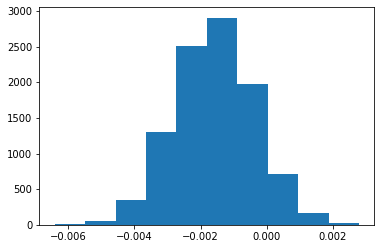

In [39]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

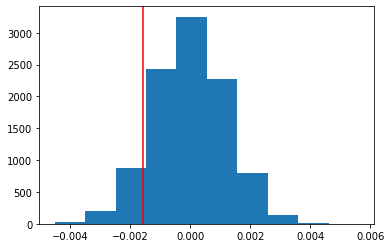

In [40]:
null_vals = np.random.normal(0, np.std(p_diffs), 10000)
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
plt.hist(null_vals)
plt.axvline(obs_diff, c='red')

**We can find the p-value like this:**

In [41]:
(null_vals > obs_diff).mean()

0.9058

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Since the p-value is not that extreme in favor of the alternative, we should stay with the null hypotheses**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [55]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()
n_old = df2[df2.group == 'control'].converted.count()
n_new = df2[df2.group == 'treatment'].converted.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [59]:
diffs = (convert_new/n_new) - (convert_old/n_old)
from statsmodels.stats.proportion import proportions_ztest
counts = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])
stat, pval = proportions_ztest(counts, nobs, 0, alternative='larger')
stat, pval

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value computed again which is large advocates that the difference is not that significant and we shoult stay with the null hypotheses. The p-value agrees with the previous one but statistic does not correspond.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [160]:
df2['intercept'] = 1
df2[['old_page', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [64]:
import statsmodels.api as sm
mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        19:55:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [67]:
np.exp(-0.0150)

0.9851119396030626

**Diriving from that We can say  that ab_page does not significantly matter here. In fact, for every one extra one new user, converted rate is 0.985 times as likely** 

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**In our regression model the null hypotheses is that the corresponding coefficient is equal to zero. For ab_page the p-value (0.19) is quite large so we can stay with the null hypotheses and throw away this coefficient. And the null hypotheses in Part II is that the difference of conversion rate between new and old users is equal to zero or smaller than zero.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**If conversion rate does not increase with the new page, it may be useful to consider other factors that may be accelerating conversion rate. In the meantime small amount of information about other factors may lead false outcomes**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [130]:
df_country = pd.read_csv('countries.csv')
df2_countries = df2.join(df_country.set_index('user_id'), on='user_id')
country_columns = np.sort(df2_countries['country'].unique()).tolist()
country_columns

['CA', 'UK', 'US']

In [131]:
df2_countries[country_columns] = pd.get_dummies(df2_countries['country'])
df2_countries.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,old_page,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,CA,1,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0,US,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1,CA,1,0,0


In [132]:
mod = sm.Logit(df2_countries['converted'], df2_countries[['intercept', 'ab_page', 'UK', 'US']])
res = mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sat, 21 Nov 2020   Pseudo R-squ.:               2.324e-05
Time:                        22:24:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [133]:
np.exp(0.0506), np.exp(0.0408)

(1.0519020483004984, 1.0416437559600236)

**For every one extra UK new user, converted rate is 1.0519 times as likely keeping other factors constant. For every one extra US new user, converted rate is  1.0416 times as likely keeping other factors constant.**

**We can also take into account time factor:**

In [143]:
df2_countries['timestamp'] = pd.to_datetime(df2_countries['timestamp'])
df2_countries['periods'] = df2_countries['timestamp'].dt.to_period("D")
df2_countries['periods'].unique()

<PeriodArray>
['2017-01-21', '2017-01-12', '2017-01-11', '2017-01-08', '2017-01-10',
 '2017-01-19', '2017-01-17', '2017-01-04', '2017-01-15', '2017-01-18',
 '2017-01-09', '2017-01-22', '2017-01-24', '2017-01-23', '2017-01-20',
 '2017-01-05', '2017-01-06', '2017-01-13', '2017-01-07', '2017-01-03',
 '2017-01-02', '2017-01-16', '2017-01-14']
Length: 23, dtype: period[D]

**As we can see, the test was conducted in January 2017. So we can take as dummies every particular date in that period.**

In [158]:
dates = pd.get_dummies(df2_countries['periods']).columns.tolist()
df2_countries[dates] = pd.get_dummies(df2_countries['periods'])
mod = sm.Logit(df2_countries['converted'], df2_countries[['intercept', 'ab_page', 'UK', 'US'] + dates[1:len(dates)]])
res = mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366072
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290559
Method:                           MLE   Df Model:                           25
Date:                Sat, 21 Nov 2020   Pseudo R-squ.:               0.0001336
Time:                        23:09:01   Log-Likelihood:            -1.0637e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2883
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0005      0.048    -41.741      0.000      -2.094      -1.907
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
UK             0.0509      0.028      1.794      0.073      -0.005       0.107
US             0.0408      0.027      1.518      0.129      -0.012       0.093
2017-01-03    -0.0860      0.049     -1.764      0.078      -0.182       0.010
2017-01-04    -0.0324      0.048     -0.669      0.504      -0.127       0.063
2017-01-05    -0.0344      0.049     -0.708      0.479      -0.130       0.061
2017-01-06    -0.0309      0.048     -0.639      0.523      -0.126       0.064
2017-01-07    -0.0392      0.048     -0.809      0.419      -0.134       0.056
2017-01-08    -0.0277      0.048     -0.573      0.567      -0.122       0.067
2017-01-09    -0.0367      0.048     -0.758      0.449      -0.132       0.058
2017-01-10    -0.0294      0.048     -0.609      0.543      -0.124       0.065
2017-01-11    -0.0547      0.048     -1.127      0.260      -0.150       0.040
2017-01-12    -0.0050      0.048     -0.104      0.917      -0.100       0.090
2017-01-13    -0.0830      0.049     -1.701      0.089      -0.179       0.013
2017-01-14     0.0022      0.048      0.046      0.964      -0.092       0.097
2017-01-15    -0.0544      0.049     -1.120      0.263      -0.150       0.041
2017-01-16    -0.0211      0.048     -0.435      0.663      -0.116       0.074
2017-01-17     0.0211      0.048      0.439      0.661      -0.073       0.116
2017-01-18     0.0190      0.048      0.395      0.693      -0.075       0.114
2017-01-19    -0.0391      0.049     -0.807      0.420      -0.134       0.056
2017-01-20    -0.0596      0.049     -1.226      0.220      -0.155       0.036
2017-01-21    -0.0174      0.048     -0.361      0.718      -0.112       0.077
2017-01-22    -0.0393      0.048     -0.812      0.417      -0.134       0.056
2017-01-23     0.0058      0.048      0.121      0.904      -0.089       0.100
2017-01-24    -0.0274      0.054     -0.508      0.611      -0.133       0.078
==============================================================================
"""

In [159]:
np.exp(-0.0860), np.exp(-0.0830)

(0.9175942312201509, 0.9203511472201247)

**Apart from "2017-01-03" and "2017-01-13" other coefficients' p-values are large enough and we can throw away these coefficients. However, "2017-01-03" and "2017-01-13" dates' practical significance is very weak because every extra these dates conversion rate is only about 0.92 times as likely. So they have not practical significance.**